In [8]:

# Lib de visualition
import seaborn as sns
import matplotlib.pyplot as plt
# Pour que les graphique s'affichent dans le notebook
%matplotlib inline 


# Pour afficher des images (pas besoin de taper cet import)
from IPython.display import Image

## Back to data again

On a commencé à analyser les données de Pokemons et à afficher plusieurs graphiques pour avoir une vision de nos données. Le problème avec les données c'est que dans la vrai vie, les données ne sont pas propre (**dirty data**)...

Par contre, comme l'on sait déja manier un peu les DataFrames et les graphiques on peux plus facilement arriver à détecter ces petits problèmes ;)

In [9]:
Image(url="http://i.giphy.com/LY1DH1AMbG0tq.gif")

## Titanic dataset :

 - On va analyser un jeu de données sur les passagers du Titanic, et comme vous devez le savoir (Spoiler) y'a eu un petit soucis...
 - Télécharger le fichier **train.csv*** dans le répertoire **data**

In [10]:
Image(url="http://i.giphy.com/12eayhW3TRPCjS.gif")

## Analyse data :

### Petits rappels

Pour lire un fichier **.csv** on utilise la fonction de **read_csv** de la librairie **Pandas**. Si vous voulez connaitre l'ensemble de paramètres de la fonction : *read_csv?* (une fenêtre d'aide s'ouvrira).

In [11]:
# Charger la lib
import pandas as pd

In [12]:
#Afficher l'aide
#pd.read_csv?

In [13]:
data = pd.read_csv('data/train.csv')   # Chargement des données.

Pour regarder les données :
 - **.head()** -> affiche les 5 premières lignes
 - **.tail()** -> affiche les 5 dernières lignes
 - **.head(15)** -> affiche les 15 premères lignes

In [14]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### Signification des colonnes :

- **Survived** : indique la mort ou la survie du passager pour les données d'apprentissage. C'est ce que l'on doit prédire sur fichier test. Cette valeur est booléene (0 ou 1) : 1 pour survie, 0 pour la mort
- **Pclass** : La classe des chambres du navire (3 niveaux), 1 étant la meilleure classe et 3 la classe "éco". C'est une variable texte qui va falloir transformer en faisant attention car il y a une notion d'ordre.
- **Name** : Nom de la personne
- **Sex** : Sexe du passager
- **Age** : âge du passager
- **SisbSp** : (Sibling and Spouse) : le nombre de membres de la famille du passager de type frère, soeur, demi-frère, demi-soeur, époux, épouse...
- **Parch** : (Parent and Child) : le nombre de membres de la famille du passager du type père, mère, fils, fille, beau-fils, etc...
- **Ticket** : Numéro du ticket
- **Fare** : le prix du ticket
- **Cabin** : numéro de cabine
- **Embarked** : le port d'embarquement du passager : C -> Cherbourg; Q -> Queenstown; S -> Southampton

### Analyse Maccro des données 

1) Connaitre les nombres de lignes et colonnes :

In [16]:
data.shape

(891, 12)

2) Connaitre les type des colonnes :

In [17]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

3) Connaitre la distribution des nos données :

In [18]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* **Uniquement que pour les données numériques**

## Analyse par colonnes : 

In [19]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Embarked : 

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [21]:
data.Embarked.value_counts(normalize=True)

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

Il semble qu'il manque quelques valeurs pour **Embarked** et on déteste les valeurs absentes...

In [22]:
Image(url="http://i.giphy.com/I3wsrN9ndx11m.gif")

In [23]:
# Voir le mask des données absente sur une colonne
pd.isnull(data.Embarked)

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
861    False
862    False
863    False
864    False
865    False
866    False
867    False
868    False
869    False
870    False
871    False
872    False
873    False
874    False
875    False
876    False
877    False
878    False
879    False
880    False
881    False
882    False
883    False
884    False
885    False
886    False
887    False
888    False
889    False
890    False
Name: Embarked, dtype: bool

In [24]:
#Connaitre les lignes ou il y a des données absentes
data[pd.isnull(data.Embarked)]  # On affiche notre dataframe avec une condition

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


On sait que la valeurs la plus présente (largement) est "S". On va donc remplir les données vide par "S"

In [25]:
data["Embarked"] = data["Embarked"].fillna("S") 

In [26]:
data[pd.isnull(data.Embarked)] # Il n'y a plus de données absentes

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [27]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


On regarde si "Embarked" est lié à la survie des passagers :

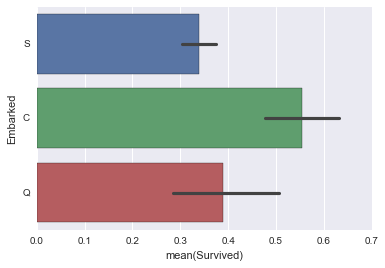

In [28]:
sns.barplot(x='Survived', y="Embarked", data=data)#, order=[1,0])

In [29]:
# Quelle est la survie moyenne selon les valeurs "Embarked"
Embarked_group = data[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean()
Embarked_group

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


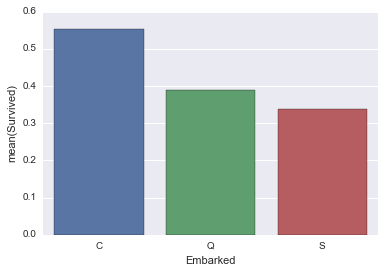

In [30]:
# Graphique
sns.barplot(x='Embarked', y='Survived', data=Embarked_group)

## Fare : Prix du voyage

Analyse d'une données continue

In [31]:
data.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

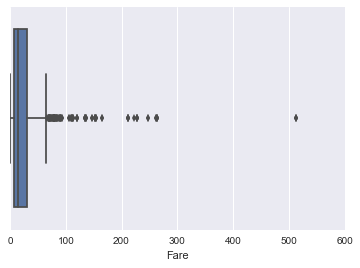

In [32]:
sns.boxplot(data.Fare)

**Le prix est il lié à la survie ?**

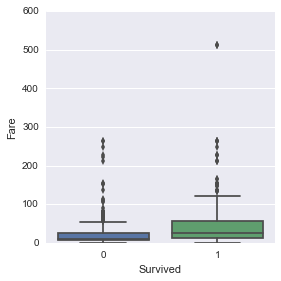

In [33]:
sns.factorplot(x="Survived", y="Fare",
                   data=data, kind="box")

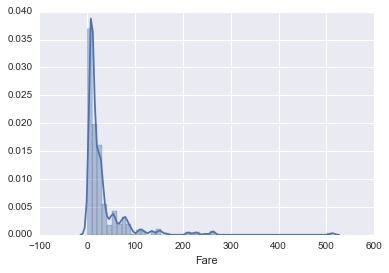

In [34]:
# Analyse de la distribution du prix des billets
sns.distplot(data.Fare)

In [35]:
fare_survived = data[data.Survived == 1]
fare_not_survived = data[data.Survived == 0]

fare_not_survived.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


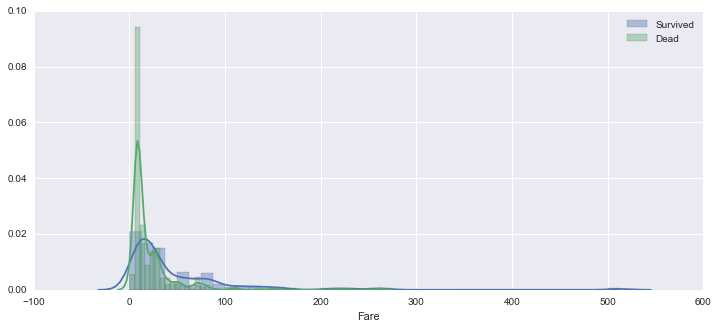

In [36]:
plt.figure(figsize=(12,5))  # Agrandir le graphique
sns.distplot(fare_survived.Fare, label="Survived")   # Survived
sns.distplot(fare_not_survived.Fare, label="Dead")   # Dead
plt.legend()  # On affiche la légende

### Sexe des passagers :

In [37]:
data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

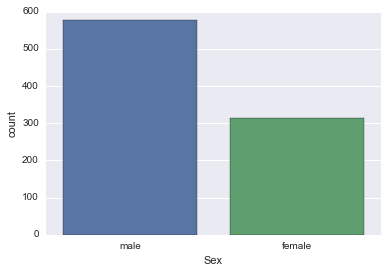

In [38]:
sns.countplot(data.Sex)

In [39]:
# Moyenne de survie suivant le sexe du passager
grp_sex = data[["Sex", "Survived"]].groupby(['Sex'],as_index=False).mean()
grp_sex

,Sex,Survived
0,female,0.742038
1,male,0.188908


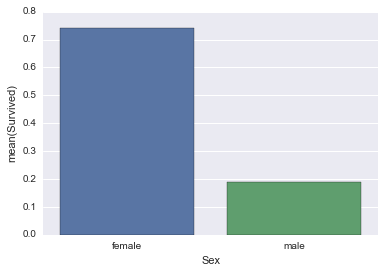

In [40]:
sns.barplot(x='Sex', y='Survived', data=grp_sex)

### Pclass des passagers :

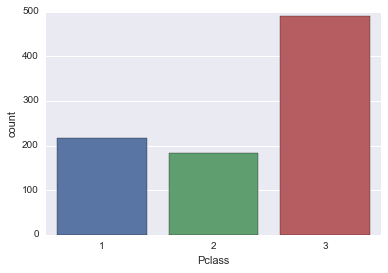

In [41]:
sns.countplot(data.Pclass)

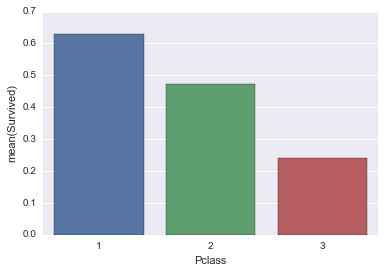

In [42]:
# Moyenne de survie suivant la classe du passager
grp_class = data[["Pclass", "Survived"]].groupby(['Pclass'],as_index=False).mean()
sns.barplot(x='Pclass', y='Survived', data=grp_class)

### Age des passagers : 

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


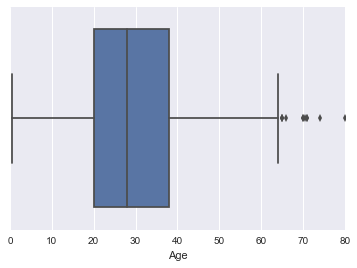

In [44]:
sns.boxplot(data.Age)

In [45]:
data[pd.isnull(data.Age)].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [46]:
len(data[pd.isnull(data.Age)])  # Nombre de ligne ou il n'y a pas d'age...

177

Lorsqu'il y a une absence non négligeable de données (pour les données continues), il y a plusieurs possibilité afin de résoudre le problème :
    - Prendre la valeurs la plus présente
    - Prendre la moyenne
    - prendre la médianne
    - Créer des données qui respecte les données d'origine

#### Connaitre la valeurs la plus présente :

In [47]:
data.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
28.00    25
21.00    24
25.00    23
36.00    22
29.00    20
32.00    18
27.00    18
35.00    18
26.00    18
16.00    17
31.00    17
20.00    15
33.00    15
23.00    15
34.00    15
39.00    14
17.00    13
42.00    13
40.00    13
45.00    12
38.00    11
50.00    10
2.00     10
4.00     10
47.00     9
         ..
71.00     2
59.00     2
63.00     2
0.83      2
30.50     2
70.00     2
57.00     2
0.75      2
13.00     2
10.00     2
64.00     2
40.50     2
32.50     2
45.50     2
20.50     1
24.50     1
0.67      1
14.50     1
0.92      1
74.00     1
34.50     1
80.00     1
12.00     1
36.50     1
53.00     1
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, dtype: int64

24 est la valeurs la plus présente

In [48]:
data_age_1 = data.copy()  # On fait une copie de notre DataFrame original

In [49]:
data_age_1['Age'] = data_age_1['Age'].fillna(24)

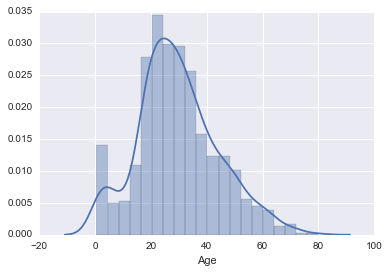

In [50]:
# Distribution de l'age de nos données d'origine (Age n'est pas vide)
sns.distplot(data[~pd.isnull(data.Age)]['Age'])

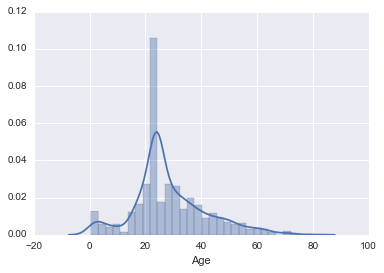

In [51]:
# Distribution de l'age de nos données lorque l'on remplie les données manquantes par la plus présente
sns.distplot(data_age_1.Age)

#### Connaitre la moyenne d'age des passagers : 

In [52]:
moyenne_age = data.Age.mean()
moyenne_age

29.69911764705882

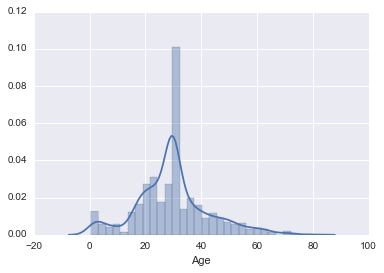

In [53]:
data_age_2 = data.copy()  # On fait une copie de notre DataFrame original
data_age_2['Age'] = data_age_2['Age'].fillna(moyenne_age)
sns.distplot(data_age_2.Age)

In [54]:
#### Connaitre la médianne d'age des passagers : 

In [55]:
median_age = data.Age.median()
median_age

28.0

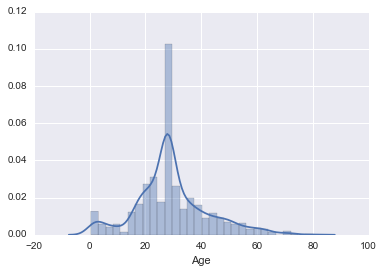

In [56]:
data_age_3 = data.copy()  # On fait une copie de notre DataFrame original
data_age_3['Age'] = data_age_3['Age'].fillna(median_age)
sns.distplot(data_age_3.Age)

#### Créer une série de données qui respecte la distribution d'origine :

Une série de données continue est caractérisé par ça moyenne et écart-type

In [57]:
mean_age   = data["Age"].mean()
std_age = data["Age"].std()
nbr_age_nan = data["Age"].isnull().sum()


print "Moyenne est " + str(mean_age) + " avec un écart-type de " + str(std_age) + " et " + str(nbr_age_nan) + " valeurs sont absentes"

Moyenne est 29.6991176471 avec un écart-type de 14.5264973323 et 177 valeurs sont absentes


In [58]:
# Lib de calcul
import numpy as np

In [59]:
np.random.randint(1, 10, 1)

array([7])

In [60]:
#(mean - std) & (mean + std)
new_age = np.random.randint(mean_age - std_age, mean_age + std_age, size = nbr_age_nan)

In [61]:
new_age

array([27, 43, 23, 33, 28, 36, 20, 26, 27, 39, 27, 17, 28, 36, 32, 27, 27,
       38, 43, 31, 43, 41, 21, 15, 38, 29, 33, 22, 28, 35, 28, 36, 28, 38,
       35, 39, 26, 16, 17, 40, 40, 40, 35, 43, 24, 19, 26, 31, 40, 17, 34,
       29, 28, 29, 24, 27, 36, 34, 16, 17, 39, 34, 38, 20, 43, 20, 30, 40,
       24, 15, 31, 17, 19, 37, 33, 42, 18, 42, 38, 42, 31, 27, 38, 17, 36,
       41, 15, 35, 27, 26, 18, 27, 33, 37, 19, 29, 41, 19, 39, 39, 18, 35,
       32, 24, 18, 35, 15, 18, 33, 37, 37, 43, 27, 34, 32, 31, 30, 30, 41,
       33, 32, 26, 19, 20, 42, 31, 16, 38, 24, 18, 37, 37, 30, 37, 17, 16,
       40, 35, 19, 23, 16, 35, 27, 33, 24, 21, 19, 37, 23, 27, 42, 29, 32,
       33, 18, 24, 35, 30, 43, 18, 16, 22, 20, 38, 25, 26, 25, 22, 27, 20,
       25, 22, 16, 26, 40, 22, 25])

In [62]:
new_age.mean()

29.175141242937855

In [63]:
data_age_4 = data.copy()  # On fait une copie de notre DataFrame original

# Remplir les valeurs d'age manquantes par notre nouvelle série de données :
data_age_4.loc[pd.isnull(data_age_4['Age']), 'Age'] = new_age

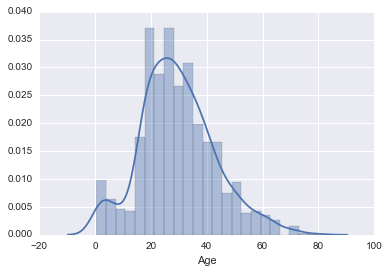

In [64]:
# Simulation d'une nouvelle série d'age
sns.distplot(data_age_4.Age)

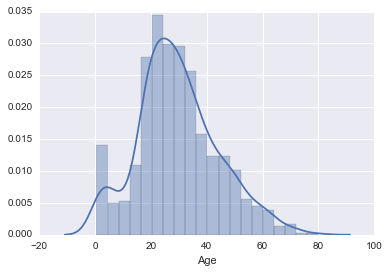

In [65]:
# Données d'origine :
sns.distplot(data[~pd.isnull(data.Age)]['Age'])

**La dernière méthode est la plus respectueuse des donnnées**

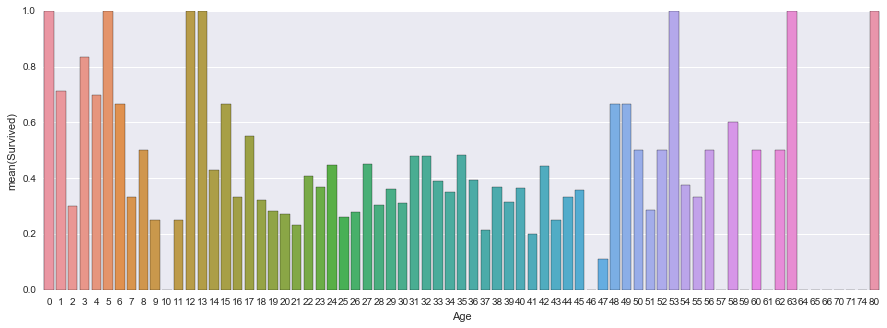

In [66]:
#Relation entre l'age et la survie des passagers

# On transforme l'age en int
data_age_4['Age'] =data_age_4['Age'].astype('int')

# On prend la moyenne de survie par age
grp_age = data_age_4[["Age", "Survived"]].groupby(['Age'], as_index=False).mean()

plt.figure(figsize=(15,5))  # Agrandir le graphique
sns.barplot(x='Age', y='Survived', data=grp_age)

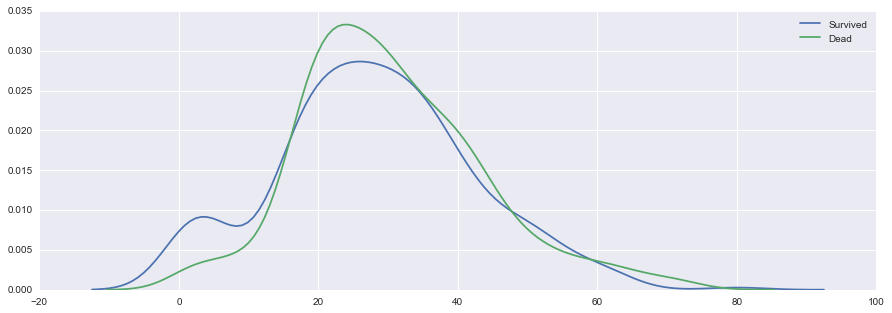

In [158]:
age_survived = data_age_4[data_age_4.Survived == 1]
age_not_survived = data_age_4[data_age_4.Survived == 0]

plt.figure(figsize=(15,5))  # Agrandir le graphique
sns.kdeplot(age_survived['Age'], label="Survived")   # Survived
sns.kdeplot(age_not_survived['Age'], label="Dead")   # Dead
plt.legend()  # On affiche la légende

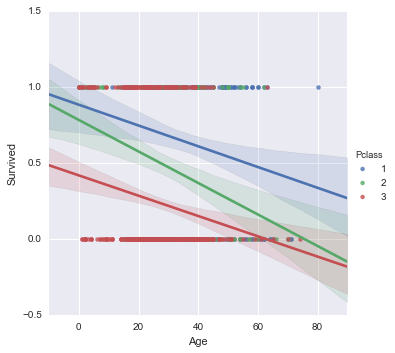

In [180]:
sns.lmplot('Age','Survived',hue='Pclass',data=data_age_4)

In [153]:
# Réaction des spé Big data qui veulent up leurs scores sur Kaggle ;)
Image(url="http://i.giphy.com/xTiTnnLkYTDWSOWSHK.gif")

## La famille :

- **SisbSp** : (Sibling and Spouse) : le nombre de membres de la famille du passager de type frère, soeur, demi-frère, demi-soeur, époux, épouse...
- **Parch** : (Parent and Child) : le nombre de membres de la famille du passager du type père, mère, fils, fille, beau-fils, etc...

In [169]:
data[['Parch', 'SibSp']].describe()

,Parch,SibSp
count,891.000000,891.000000
mean,0.381594,0.523008
std,0.806057,1.102743
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,1.000000
max,6.000000,8.000000


In [170]:
data['Family'] =  data["Parch"] + data["SibSp"]

In [172]:
data.Family.value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Family, dtype: int64

In [176]:
# Est ce que la personne à de la famille (oui ou non) --> Booléen
data['is_Family'] = 0 # On initialise notre nouvelle colonne
data.loc[data['Family'] > 0, 'is_Family'] = 1
data.loc[data['Family'] == 0, 'is_Family'] = 0

In [177]:
data.is_Family.value_counts()

0    537
1    354
Name: is_Family, dtype: int64

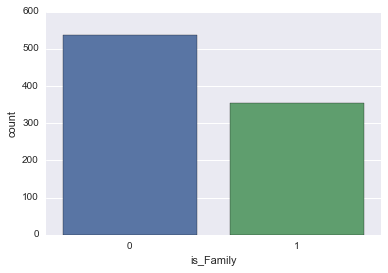

In [178]:
sns.countplot(x='is_Family', data=data)

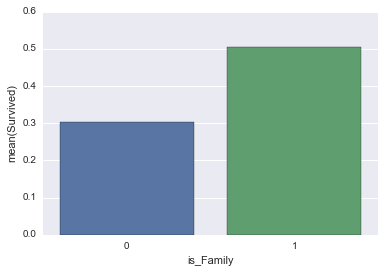

In [179]:
grp_is_family = data[["is_Family", "Survived"]].groupby(['is_Family'],as_index=False).mean()
sns.barplot(x='is_Family', y='Survived', data=grp_is_family)

## Analyse général des données

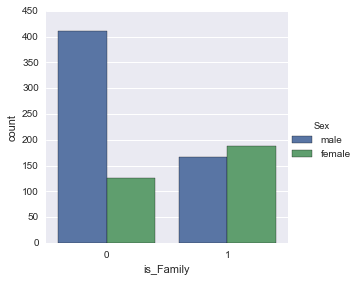

In [183]:
sns.factorplot('is_Family', data=data,hue='Sex', kind='count')

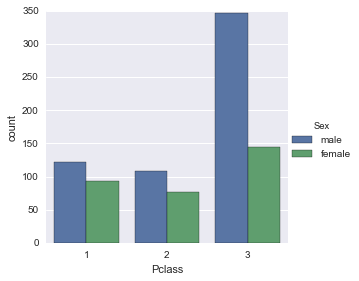

In [184]:
sns.factorplot('Pclass', data=data,hue='Sex', kind='count')

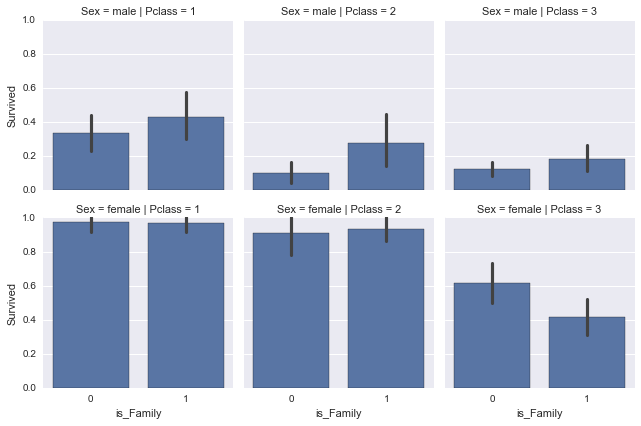

In [195]:
fig = sns.FacetGrid(data, row="Sex", col='Pclass')
fig.map(sns.barplot,'is_Family', 'Survived')

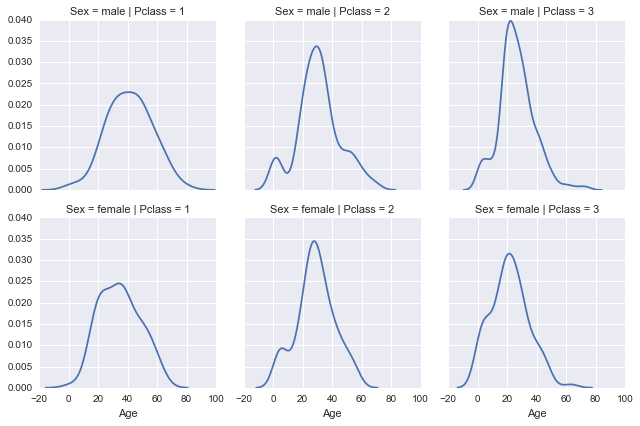

In [197]:
fig = sns.FacetGrid(data, row="Sex", col='Pclass')
fig.map(sns.kdeplot,'Age')